In [1]:
from task8module.task8module import *
import numpy as np
from typing import List
import copy

In [2]:
weights = [10., 20., 30., 50., 100., 300.]

In [3]:
np.random.seed(42)
n = 5
Madj = generate_from_n_full_weighted_directed_graph(n, weights)
Madj

array([[  0.,  50.,   0.,   0.,   0.],
       [  0.,   0., 100.,  20.,   0.],
       [ 30.,   0.,   0.,  30.,  30.],
       [100.,   0.,   0.,   0.,   0.],
       [100.,  30.,   0., 100.,   0.]])

In [4]:
Madj_with_inf = copy.deepcopy(Madj)
for i in range(n):
    for j in range(n):
        if Madj[i,j] == 0. and i != j:
            Madj_with_inf[i,j] = float("Inf")

In [5]:
Madj_with_inf

array([[  0.,  50.,  inf,  inf,  inf],
       [ inf,   0., 100.,  20.,  inf],
       [ 30.,  inf,   0.,  30.,  30.],
       [100.,  inf,  inf,   0.,  inf],
       [100.,  30.,  inf, 100.,   0.]])

In [6]:
improved_all_pairs_shortest_paths(Madj_with_inf.tolist())

[[0, 50.0, 150.0, 70.0, 180.0],
 [120.0, 0, 100.0, 20.0, 130.0],
 [30.0, 60.0, 0, 30.0, 30.0],
 [100.0, 150.0, 250.0, 0, 280.0],
 [100.0, 30.0, 130.0, 50.0, 0]]

{(0, 1): Text(0.654508476093664, 0.47552828417802706, '50.0'),
 (1, 2): Text(-0.25000005215406573, 0.7694209149307285, '100.0'),
 (1, 3): Text(-0.25000002235174246, 0.18163562362300228, '20.0'),
 (2, 0): Text(0.09549147175227024, 0.2938926307527015, '30.0'),
 (2, 3): Text(-0.8090170266931362, -2.980232327587373e-08, '30.0'),
 (2, 4): Text(-0.24999997764825752, -0.18163562362300228, '30.0'),
 (3, 0): Text(0.09549150155459352, -0.2938926605550248, '100.0'),
 (4, 0): Text(0.6545085505994722, -0.4755282543757038, '100.0'),
 (4, 1): Text(0.3090170266931363, 2.980232327587373e-08, '30.0'),
 (4, 3): Text(-0.24999994784593424, -0.7694209149307285, '100.0')}

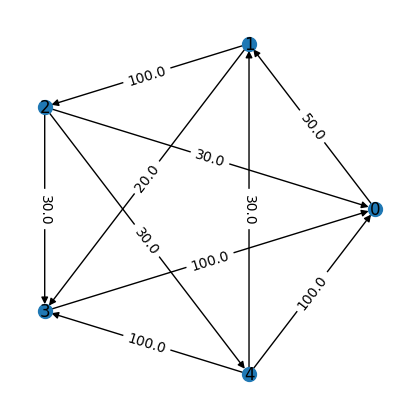

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
g = nx.from_numpy_matrix(Madj, create_using=nx.DiGraph)
np.random.seed(429)
plt.figure(figsize=(4, 4))
nx.draw(g, node_size = 100, pos = nx.circular_layout(g),  with_labels = True )
labels = nx.get_edge_attributes(g,'weight')
nx.draw_networkx_edge_labels(g,pos = nx.circular_layout(g),edge_labels=labels)

0.0001714651950922629


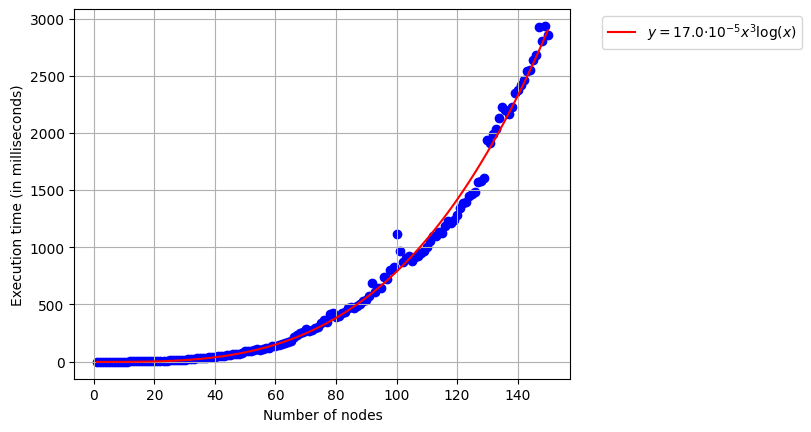

In [8]:
np.random.seed(42)
plot_algo_complexity_info(150, lambda x: x**3*np.log(x), "$x^3 \log(x)$")

In [9]:
from Task6.task6module.task6module import generate_from_nm_weighted

In [10]:
np.random.seed(42)
Madj2 = generate_from_nm_weighted(7, 10, possibleweights=weights)

In [11]:
Madj2

array([[  0,   0,   0,  30,   0,  30,   0],
       [  0,   0,   0,   0,   0, 100,  50],
       [  0,   0,   0, 100,   0,   0,  20],
       [ 30,   0, 100,   0,   0,   0, 100],
       [  0,   0,   0,   0,   0,  30,  30],
       [ 30, 100,   0,   0,  30,   0, 100],
       [  0,  50,  20, 100,  30, 100,   0]])

In [12]:
Madj2_with_inf = copy.deepcopy(Madj2).astype("float")
np.random.seed(42)
for i in range(6):
    for j in range(i+1, 7):
        if Madj2[i, j] == 0:
            Madj2_with_inf[i,j], Madj2_with_inf[j,i] = float("Inf"), float("Inf")
        else:
            if np.random.random(1)>0.5:
                Madj2_with_inf[i,j] = float("Inf")
                Madj2[i, j] = 0
            else:
                Madj2_with_inf[j,i] = float("Inf")
                Madj2[j, i] = 0
Madj2_with_inf

array([[  0.,  inf,  inf,  30.,  inf,  inf,  inf],
       [ inf,   0.,  inf,  inf,  inf,  inf,  inf],
       [ inf,  inf,   0., 100.,  inf,  inf,  20.],
       [ inf,  inf,  inf,   0.,  inf,  inf, 100.],
       [ inf,  inf,  inf,  inf,   0.,  inf,  inf],
       [ 30., 100.,  inf,  inf,  30.,   0.,  inf],
       [ inf,  50.,  inf,  inf,  30., 100.,   0.]])

{(0, 3): Text(0.04951560754382245, 0.21694190912785158, '30'),
 (2, 3): Text(-0.5617448453649505, 0.7044058436357687, '100'),
 (2, 6): Text(0.2004843626538562, 0.0965481452755198, '20'),
 (3, 6): Text(-0.13873957689354838, -0.17397388861949478, '100'),
 (5, 0): Text(0.38873951728890566, -0.4874639259929682, '30'),
 (5, 1): Text(0.20048442225849894, -0.09654818785026448, '100'),
 (5, 4): Text(-0.5617448751672719, -0.7044057968035494, '30'),
 (6, 1): Text(0.6234897205322225, -5.1089693697825567e-08, '50'),
 (6, 4): Text(-0.13873957689354838, -0.6078576600429786, '30'),
 (6, 5): Text(0.20048433285153483, -0.8783797237403146, '100')}

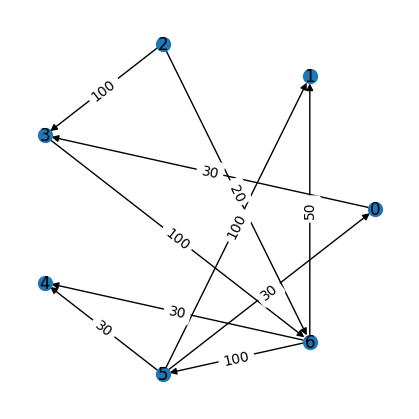

In [13]:
g2 = nx.from_numpy_matrix(Madj2, create_using=nx.DiGraph)
np.random.seed(429)
plt.figure(figsize=(4, 4))
nx.draw(g2, node_size =100, pos = nx.circular_layout(g2),  with_labels = True )
labels = nx.get_edge_attributes(g2,'weight')
nx.draw_networkx_edge_labels(g2,pos = nx.circular_layout(g2),edge_labels=labels)

In [14]:
improved_all_pairs_shortest_paths(Madj2_with_inf.tolist())

[[0, 180.0, inf, 30.0, 160.0, 230.0, 130.0],
 [inf, 0, inf, inf, inf, inf, inf],
 [150.0, 70.0, 0, 100.0, 50.0, 120.0, 20.0],
 [230.0, 150.0, inf, 0, 130.0, 200.0, 100.0],
 [inf, inf, inf, inf, 0, inf, inf],
 [30.0, 100.0, inf, 60.0, 30.0, 0, 160.0],
 [130.0, 50.0, inf, 160.0, 30.0, 100.0, 0]]